In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
df = pd.read_csv("../../datasets/housing-prices-dataset/numerical_train.csv")

In [3]:
df.head()

,SalePrice,OverallQual,LotArea,EnclosedPorch,TotRmsAbvGrd,MiscVal,KitchenAbvGr,PoolArea,WoodDeckSF,GrLivArea,...,HalfBath,ScreenPorch,BsmtFullBath,LotFrontage,BsmtFinSF1,MasVnrArea,YearBuilt,Fireplaces,MSSubClass,LowQualFinSF
0,208500,7,8450,0,8,0,1,0,0,1710,...,1,0,1,65.0,706,196.0,2003,0,60,0
1,181500,6,9600,0,6,0,1,0,298,1262,...,0,0,0,80.0,978,0.0,1976,1,20,0
2,223500,7,11250,0,6,0,1,0,0,1786,...,1,0,1,68.0,486,162.0,2001,1,60,0
3,140000,7,9550,272,7,0,1,0,0,1717,...,0,0,1,60.0,216,0.0,1915,1,70,0
4,250000,8,14260,0,9,0,1,0,192,2198,...,1,0,1,84.0,655,350.0,2000,1,60,0


In [4]:
df.fillna(1,inplace=True)

### Getting data ready for the model

In [5]:
y = df['SalePrice'].values
df.drop(columns=['SalePrice'],inplace=True)
X = df.values

### Using 3 Degree polynomial

In [6]:
polyFeatures = PolynomialFeatures(2)

In [7]:
X = polyFeatures.fit_transform(X)

In [8]:
X[:10]

array([[1.0000e+00, 7.0000e+00, 8.4500e+03, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+00, 9.6000e+03, ..., 4.0000e+02, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.0000e+00, 1.1250e+04, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 7.0000e+00, 1.0382e+04, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.0000e+00, 6.1200e+03, ..., 2.5000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 5.0000e+00, 7.4200e+03, ..., 3.6100e+04, 0.0000e+00,
        0.0000e+00]])

In [9]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.20)

### Model Training

In [10]:
LR = LinearRegression()

In [11]:
LR.fit(x_train,y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
val_predictions = LR.predict(x_val)

### Plotting data and regression line

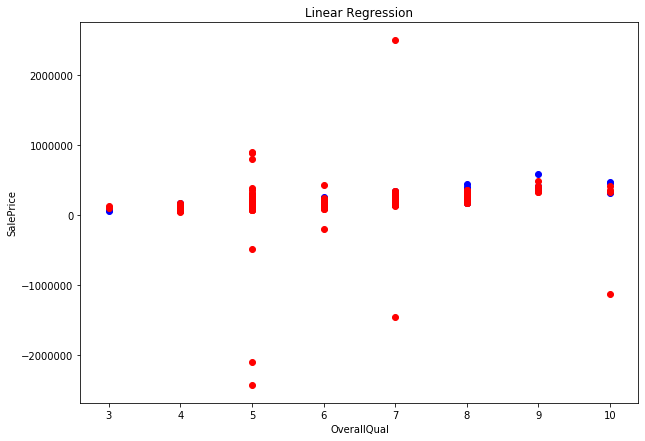

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x_val[:,1], y_val, color = 'blue') 
plt.scatter(x_val[:,1], LR.predict(x_val), color = 'red')
#plt.plot(x_val[:,1], LR.predict(x_val), color = 'k')
plt.title('Linear Regression') 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice')
plt.show()

The red dots are the predicted points for any given value of **OverallQual**

In [14]:
LR.score(x_val,y_val.reshape(-1,1))

-15.48513339168792

Doing very bad!